In [ ]:
pip install palmerpenguins

In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from palmerpenguins import load_penguins
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from plotnine import ggplot, aes, geom_line, geom_point, labs, theme_minimal, theme, element_text

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [ ]:
penguins = load_penguins()
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [ ]:
X = penguins.drop(['bill_depth_mm', 'island'], axis = 1)
y = penguins['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3)

lr = LinearRegression()
enc = OneHotEncoder()
poly = PolynomialFeatures(2)


ct = ColumnTransformer(
  [
    ("dummify",
    enc,
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

In [ ]:
## Preprocessing: One-Hot-Encode
## Model Spec: Linear Regression

mls_pipeline = Pipeline(
  [('dummify_standardize' , ct), ('ols', lr)]
)

In [ ]:
fitted_pipeline = mls_pipeline.fit(X_train, y_train)

y_preds_test_mls = fitted_pipeline.predict(X_test)
y_preds_train_mls = fitted_pipeline.predict(X_train)

mse_test_mls = mean_squared_error(y_test, y_preds_test_mls)
mse_train_mls = mean_squared_error(y_train, y_preds_train_mls)
r_sq_test_mls = r2_score(y_test, y_preds_test_mls)
r_sq_train_mls = r2_score(y_train, y_preds_train_mls)

In [ ]:
mse_test_mls

0.60117605238282

In [ ]:
mse_train_mls

0.6047321407293013

In [ ]:
r_sq_test_mls

0.8470401918349099

In [ ]:
r_sq_train_mls

0.8420137136464555

In [ ]:
## Preprocessing: One-Hot-Encode
## Model Spec: K Nearest k = 5

kn_pipeline_1 = Pipeline(
  [('dummify_standardize' , ct), ('knearest', KNeighborsRegressor(n_neighbors = 5))]
)

In [ ]:
fitted_pipeline = kn_pipeline_1.fit(X_train, y_train)

y_preds_test_kn_1 = fitted_pipeline.predict(X_test)
y_preds_train_kn_1 = fitted_pipeline.predict(X_train)

mse_test_kn_1 = mean_squared_error(y_test, y_preds_test_kn_1)
mse_train_kn_1 = mean_squared_error(y_train, y_preds_train_kn_1)
r_sq_test_kn_1 = r2_score(y_test, y_preds_test_kn_1)
r_sq_train_kn_1 = r2_score(y_train, y_preds_train_kn_1)

In [ ]:
mse_test_kn_1

0.6808142857142858

In [ ]:
mse_train_kn_1

0.487243373493976

In [ ]:
r_sq_test_kn_1

0.8267774936706943

In [ ]:
r_sq_train_kn_1

0.8727076569208776

In [ ]:
## Preprocessing: One-Hot-Encode
## Model Spec: K Nearest k = 20

kn_pipeline_2 = Pipeline(
  [('dummify_standardize' , ct), ('knearest', KNeighborsRegressor(n_neighbors = 20))]
)

In [ ]:
fitted_pipeline = kn_pipeline_2.fit(X_train, y_train)

y_preds_test_kn_2 = fitted_pipeline.predict(X_test)
y_preds_train_kn_2 = fitted_pipeline.predict(X_train)

mse_test_kn_2 = mean_squared_error(y_test, y_preds_test_kn_2)
mse_train_kn_2 = mean_squared_error(y_train, y_preds_train_kn_2)
r_sq_test_kn_2 = r2_score(y_test, y_preds_test_kn_2)
r_sq_train_kn_2 = r2_score(y_train, y_preds_train_kn_2)

In [ ]:
mse_test_kn_2

0.7054074404761909

In [ ]:
mse_train_kn_2

0.6093160642570286

In [ ]:
r_sq_test_kn_2

0.8205201515499541

In [ ]:
r_sq_train_kn_2

0.8408161635142584

In [ ]:
## Preprocessing: One-Hot-Encode
## Model Spec: Decision Tree

dtree_pipeline = Pipeline(
  [('dummify_standardize' , ct), ('decision_tree', DecisionTreeRegressor(min_samples_leaf = 5))]
)

In [ ]:
fitted_pipeline = kn_pipeline_2.fit(X_train, y_train)

y_preds_test_dtree = fitted_pipeline.predict(X_test)
y_preds_train_dtree = fitted_pipeline.predict(X_train)

mse_test_dtree = mean_squared_error(y_test, y_preds_test_dtree)
mse_train_dtree = mean_squared_error(y_train, y_preds_train_dtree)
r_sq_test_dtree = r2_score(y_test, y_preds_test_dtree)
r_sq_train_dtree = r2_score(y_train, y_preds_train_dtree)

In [ ]:
mse_test_dtree

0.7054074404761909

In [ ]:
mse_train_dtree

0.6093160642570286

In [ ]:
r_sq_test_dtree

0.8205201515499541

In [ ]:
r_sq_train_dtree

0.8408161635142584

In [ ]:
plot_data = {
    'Model': ['Linear Regression', 'KNN (k=5)', 'KNN (k=20)', 'Decision Tree',
              'Linear Regression', 'KNN (k=5)', 'KNN (k=20)', 'Decision Tree'],
    'Set': ['Train', 'Train', 'Train', 'Train',
            'Test', 'Test', 'Test', 'Test'],
    'MSE': [mse_train_mls, mse_train_kn_1, mse_train_kn_2, mse_train_dtree,
            mse_test_mls, mse_test_kn_1, mse_test_kn_2, mse_test_dtree],
    'R^2': [r_sq_train_mls, r_sq_train_kn_1, r_sq_train_kn_2, r_sq_train_dtree,
            r_sq_test_mls, r_sq_test_kn_1, r_sq_test_kn_2, r_sq_test_dtree]
}

performance_df = pd.DataFrame(plot_data)

In [ ]:
performance_df

,Model,Set,MSE,R^2
0,Linear Regression,Train,0.604732,0.842014
1,KNN (k=5),Train,0.487243,0.872708
2,KNN (k=20),Train,0.609316,0.840816
3,Decision Tree,Train,0.609316,0.840816
4,Linear Regression,Test,0.601176,0.847040
5,KNN (k=5),Test,0.680814,0.826777
6,KNN (k=20),Test,0.705407,0.820520
7,Decision Tree,Test,0.705407,0.820520


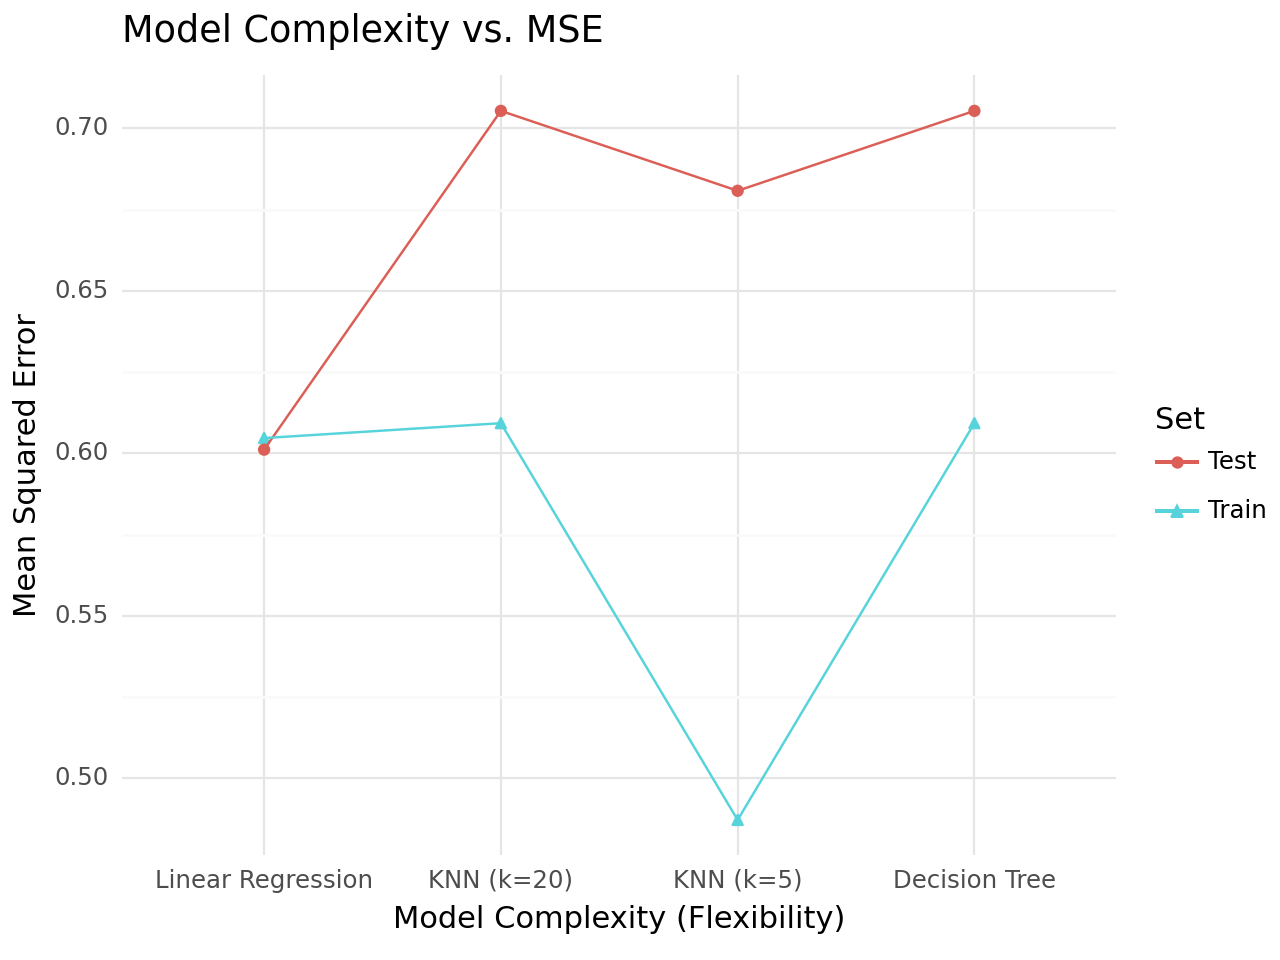

<Figure Size: (640 x 480)>

In [ ]:
performance_df['Model'] = pd.Categorical(performance_df['Model'],
                                         categories=['Linear Regression', 'KNN (k=20)', 'KNN (k=5)', 'Decision Tree'],
                                         ordered=True)

(ggplot(performance_df,
        aes(x='Model',
            y='MSE',
            color='Set',
            shape='Set'))
+ geom_point()
+ geom_line(aes(group='Set'))
+ labs(x='Model Complexity (Flexibility)', y='Mean Squared Error', title='Model Complexity vs. MSE')
+ theme_minimal()
)


The Linear Regression model, with an MSE of just above 0.6 for both training and test datasets, demonstrates the best performance among the different models. This indicates that it is neither overfitting nor underfitting the data. The KNN model with k=5 looks like it is overfitting because it has the lowest training MSE but a significantly higher test MSE. In contrast, the KNN model with k=20 and the Decision Tree both show worse performance when evaluated on MSE as they have higher MSES for both the training and test data. Overall, I would stick with the linear regression model as it has the lowest MSEs and is consistent across both the training and test data.

Citations:

- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html


Assisted by ChatGPT for:

- ordering categories of df for plot